<h1 style="text-align:center; font-family:sans"><b>Analyzing ECG</b></h1>
<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans">
We have recorded an ECG signal for several hours with a sampling rate of 1000 Hz. The data has been saved as an EDF (<b>E</b>uropean <b>D</b>ata <b>F</b>ormat) file [<a href=”https://www.edfplus.info/”>1</a>]. The shape and characteristic times between individual events within a hart beat can give us a deep insight about the health of the heart [<a href=”https://www.health.harvard.edu/heart-health/understanding-the-ecg-reading-the-waves”>2</a>]. A normal hart beat is usually divided into 5 points [<a href="http://www.medicine-on-line.com/html/ecg/e0001en_files/05.htm">3</a>].
</p>
    
<img src="PQRST_basic.png" data-align="center" style="height:50%;width:50%;"></img>

<p style="text-align:justify; font-family:sans;">
Our goal is developed an algorithm which can:
<li style="font-family:sans">Detect those 5 points and compute the characteristic times, which are shown in the figure.</li>
<li style="font-family:sans">Compute the mean and standard deviations of the computed times.</li>
<li style="font-family:sans">Give an estimation if the computed times are characteristic for a healthy hart.</li>
<li style="font-family:sans">Compute the instantaneous heart rate and the average as well as the standard deviation of the hard rate.</li>
<li style="font-family:sans">Compute average minute heart rate.</li>
<li style="font-family:sans">Draw RR poincaré plot [<a href="https://www.physionet.org/events/hrv-2006/yang.pdf">4</a>].</li>
</p>
</div>

<h2 style="text-align:center; font-family:sans"> Detect PQRST ponints</h2>
<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans">
In order to process the data, we need to import the data. Try import the standard library for opening EDF files. If you encounter and error at this step install the library.

So let's load the data.
</p>
</div>

In [1]:
import pyedflib
f = pyedflib.EdfReader("01-35-22.EDF") #Load the data

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans">
    In the next step we will eximane the content.
</p>
</div>

In [2]:
n = f.signals_in_file #Read header containing the column names.
print(n)

signal_labels = f.getSignalLabels()
print(signal_labels)
data={}
for i in range(n):
    sl=signal_labels[i]
    print(i,"Label =",sl[0:3]," || Number of points = ",f.getNSamples()[i], "fs = ",1000*(f.getNSamples()[i]/f.getNSamples()[0]))
    data[signal_labels[i]]=f.readSignal(i)

6
['ECG', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Marker', 'HRV']
0 Label = ECG  || Number of points =  20947000 fs =  1000.0
1 Label = Acc  || Number of points =  2094700 fs =  100.0
2 Label = Acc  || Number of points =  2094700 fs =  100.0
3 Label = Acc  || Number of points =  2094700 fs =  100.0
4 Label = Mar  || Number of points =  20947 fs =  1.0
5 Label = HRV  || Number of points =  104735 fs =  5.0


<div style="background-color: coral;">
    <p style="text-align:justify; font-family:Georgia; font-size:14px;" >
We can see that the original dataset holds 6 measurements. The ECG signal, the accelerations in the x, y and z direction a marker and the so called HRV (heart rate variability). in this example, we will focus solely on the ECG signal. Since, the EDF reader can cause problems, the ECG signal is additionally available also as a txt file. We import the latter as shown below via numpy.
    </p>
</div>

In [7]:
import numpy as np
data=np.loadtxt("ECG.txt")

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans;font-size:14px;">
To be able to better vizualize the data, i create a function, which normalizes the values in a given dataset (i.e. <b>XX</b>) to values between 0 and 1.
</p>
</div>

In [5]:
def normalize(xx):
    return (xx-min(xx))/(max(xx)-min(xx))

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans;font-size:14px;">
Beneth is the code to visualize the data, which is embeded in the dataset.
</p>
</div>

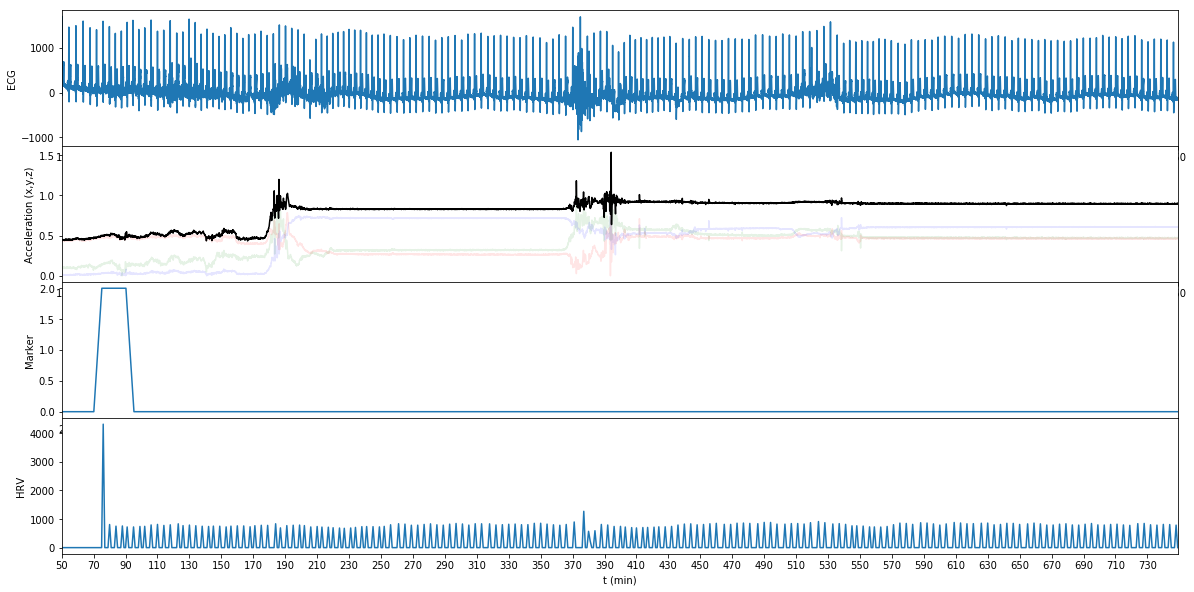

In [8]:
import matplotlib.pyplot as plt #Library used for ploting graphs

Ns1=1000 #Sample rate of ECG
Ns2=100  #Sample rate of accelerometer
Ns3=1    #Sample rate of Marker channel
Ns4=5    #Sample rate of HRV channel

TFIN=150  #End point in seconds
TSTART=10 #Starting point in seconds

plt.figure(figsize=(20,10)) #Figure size in inches

plt.subplots_adjust(hspace = .001) #Overlaping axes

ax1=plt.subplot(4, 1, 1) #We create the first subgraph out of 4
xi = [i/Ns1 for i in range(TSTART*Ns1,(TFIN)*Ns1)] #We create the x values corresponding to the data
ax1.plot(xi,data['ECG'][TSTART*Ns1:(TFIN)*Ns1])    #We plot the data
ax1.set_xticks(np.arange(min(xi), max(xi)+1, 5.0))

ax1.set_ylabel("ECG")
ax1.set_xlim([min(xi), max(xi)])


ax1=plt.subplot(4, 1, 2)

ax=data['Accelerometer_X'][TSTART*Ns2:(TFIN)*Ns2]
ay=data['Accelerometer_Y'][TSTART*Ns2:(TFIN)*Ns2]
az=data['Accelerometer_Z'][TSTART*Ns2:(TFIN)*Ns2]

ax=normalize(ax)
ay=normalize(ay)
az=normalize(az)

aa=np.sqrt(ax*ax+ay*ay+az*az)

xi = [i/Ns2 for i in range(TSTART*Ns2,(TFIN)*Ns2)]
ax1.plot(xi,ax,color="green",alpha=0.1)

ax1.plot(xi,ay,color="red",alpha=0.1)

ax1.plot(xi,az,color="blue",alpha=0.1)

ax1.plot(xi,aa,color="black")
ax1.set_xticks(np.arange(min(xi), max(xi)+1, 5.0))
ax1.set_ylabel("Acceleration (x,y,z)")
ax1.set_xlim([min(xi), max(xi)])

ax1=plt.subplot(4, 1, 3)
xi = [i/Ns4 for i in range(TSTART*Ns3,(TFIN)*Ns3)]
ax1.plot(xi,data['Marker'][TSTART*Ns3:(TFIN)*Ns3])
ax1.set_xticks(np.arange(min(xi), max(xi)+1, 5.0))
ax1.set_ylabel("Marker")
ax1.set_xlim([min(xi), max(xi)])

ax1=plt.subplot(4, 1, 4)
xi = [i/float(Ns3) for i in range(TSTART*Ns4,(TFIN)*Ns4)]
ax1.plot(xi,data['HRV'][TSTART*Ns4:(TFIN)*Ns4])
ax1.set_ylabel('HRV')
ax1.set_xticks(np.arange(min(xi), max(xi)+1, 20.0))
ax1.set_xlabel("t (min)")
ax1.set_xlim([min(xi), max(xi)])


plt.show()

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans;font-size:14px;">
From this point on, we will focus only the ECG signal. Since the analysis of the whole signal would take a lot of time, we will focus only on a 3 minute time window. But the analysis performed here in would work equally accurate for the whole signal.
</p>
</div>

In [38]:
y=data['ECG'][30*Ns1:210*Ns1]
t=[i/Ns1 for i in range(TSTART*Ns1,(TFIN)*Ns1)]

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans;font-size:14px;">
To get rid of any low frequency basal trends and high frequency noise, we will implement a band-pass filter.
</p>
</div>

In [39]:
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

ys=butter_bandpass_filter(y, 1.0, 10.0, Ns1, order=1)

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans;font-size:14px;">
In continuation we firstly define the individual P,Q,R,S and T points. We define them by firstly searching for the R points, which take on the highest value within a single heartbeat. Lastly, we define the other 4 points by searching for local extremes in the vicinity of the found R points.
</p>
</div>

In [40]:
def local_max_R(y):
    N=600
    res=[]
    for i in range(N,len(y)-N):
        a1=True
        a2=True
        for ii in range(1,N,1):
            if y[i]<y[i-ii]:
                a1=False
            if y[i]<y[i+ii]:
                a2=False
        if a1 and a2:
            if len(res)>0:
                if ((i-res[len(res)-1][0])>10):
                    res.append([i,y[i]])
            else:
                res.append([i,y[i]])
    return(res)


def local_max_PQRST(y,res):
    PQRST=[]
    for i in res:
        ii=1
        P=1
        Q=1
        S=1
        T=1
        while P or Q or S:
            cm=i[0]-ii
            cp=i[0]+ii
            if np.all(y[cp]<y[cp-30:cp-1]) and np.all(y[cp]<y[cp+1:cp+30]) and S:
            #if y[cp]<y[cp-1] and y[cp]<y[cp-2] and y[cp]<y[cp-3] and y[cp]<y[cp+1] and y[cp]<y[cp+2] and y[cp]<y[cp+3] and S:
                St=cp
                S=0
            if np.all(y[cm]>y[cm-50:cm-1]) and np.all(y[cm]>y[cm+1:cm+50]) and P and y[cm]<y[i[0]]:
                Pt=cm
                P=0
            if np.all(y[cm]<y[cm-30:cm-1]) and np.all(y[cm]<y[cm+1:cm+30]) and Q:
                Qt=cm
                Q=0
            ii+=1
        ii=1
        while T:
            cp=St+ii
            if np.all(y[cp]>y[cp-60:cp-1]) and np.all(y[cp]>y[cp+1:cp+60]) and T:
                Tt=cp
                T=0
            ii+=1
        PQRST.append([Pt,Qt,i[0],St,Tt])
    return(np.array(PQRST,dtype=int).T)

res=local_max_R(ys)
PQRST=local_max_PQRST(ys,res)
print(PQRST.shape)
P,Q,R,S,T=PQRST

(5, 220)


In [53]:
PQRSTy=[]
for i in range(len(P)):
    PQRSTy.append([ys[P[i]],ys[Q[i]],ys[R[i]],ys[S[i]],ys[T[i]]])
    #PQRSTy.append([y[P[i]],y[Q[i]],y[R[i]],y[S[i]],y[T[i]]])
PQRSTy=np.array(PQRSTy).T
Py,Qy,Ry,Sy,Ty=PQRSTy

res=np.array(res)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

TypeError: unsupported operand type(s) for /: 'list' and 'int'

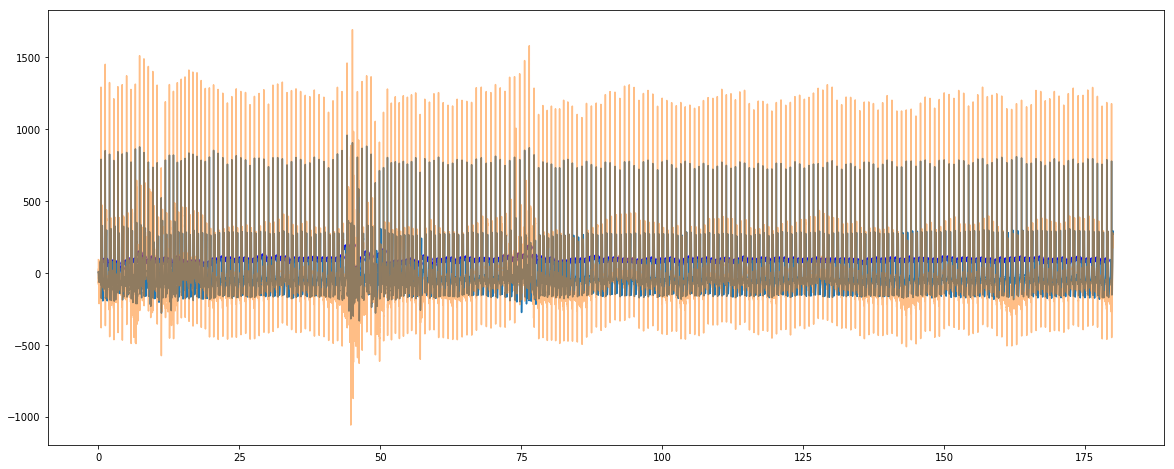

In [54]:
plt.figure(figsize=(20,8))
ax1=plt.subplot(1, 1, 1)

xi = [(i)/(Ns1) for i in range(len(ys))]

ax1.plot(xi,ys)
ax1.plot(xi,y,alpha=0.5)
ax1.scatter(P[:]/(Ns1),Py,color="blue",s=30)
ax1.scatter(Q[:]/(Ns1),Qy,color="green",s=30)
ax1.scatter(R[:]/(Ns1),Ry,color="Red",s=30)
ax1.scatter(S[:]/(Ns1),Sy,color="orange",s=30)
ax1.scatter(T[:]/(Ns1),Ty,color="black",s=30)
ax1.set_xticks(np.arange(min(xi), max(xi)+1, 10))
ax1.set_xlim([10,60])
ax1.set_ylim([-500,1800])
plt.grid()
plt.savefig("time_EKG.png",dpi=300)
plt.show()

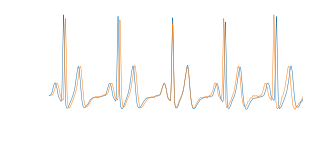

In [44]:
plt.figure(figsize=(5,2))
for i in range(50,52,1):
    yy=(ys[-1800+P[i]:T[i]+1800]-min(ys[-1800+P[i]:T[i]+1800]))/(max(ys[-1800+P[i]:T[i]+1800])-min(ys[-1800+P[i]:T[i]+1800]))
    plt.ylim([-0.1,1.05])
    plt.plot(yy,lw=0.5)
plt.axis('off')
plt.show()

<div style="background-color: coral;">
<p style="text-align:justify; font-family:sans;font-size:14px;">
Now that we know the locations of the 5 points for every heartbeat we compute the instant heart rate, <i>HR</i>. The later is computed as the inverse difference between two sequential $R$ peaks.
    
\begin{align}
HR = \frac{60}{R_{i+1} - R_i} \frac{\textrm{beats}}{\textrm{min}},
\end{align}

where $R_{i}$ time in seconds is the i-th $R$ peak.
</p>
</div>

avg(HR) = 74.23
std(HR) = 4.65
max(HR) = 88.63
min(HR) = 62.57


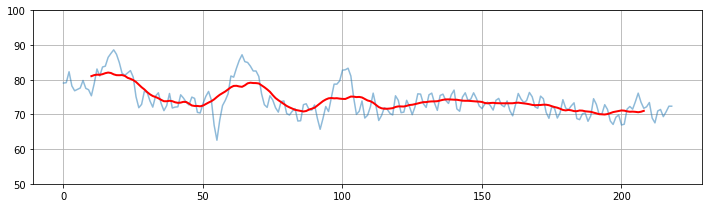

In [45]:
freq=60.0/(np.diff(res[:,0])/1000.0)

print("avg(HR) = %.2f"%(np.mean(freq)))
print("std(HR) = %.2f"%(np.std(freq)))
print("max(HR) = %.2f"%(max(freq)))
print("min(HR) = %.2f"%(min(freq)))
t=res[1:,0]/1000.0
t[:]=t[:]/60


def smooth_y(y,g):
    N=g
    w=int(N/2)
    sy=[]
    for i in range(int(N/2),len(y)-int(N/2),1):
        sy.append(np.mean(y[i-w:i+w]))
    return(sy)

g=20
w=g/2.0
sdiff=smooth_y(freq,g)


xi=[(i+w) for i in range(len(sdiff))]

scale=len(sdiff)/len(t)

plt.figure(figsize=(10,3))
plt.plot(freq,alpha=0.5)
plt.plot(xi,sdiff,lw=2,color="red")
plt.ylim([50,100])
plt.tight_layout()
plt.savefig("BMP_RENE.png",dpi=300)
plt.grid()
plt.show()

In [46]:
pisi=open("PQRST.txt","w+")
TP=[]
QP=[]
SQ=[]
TS=[]
PR=[]
QT=[]
ic=0
print("BPM TP QP SQ TS PR QT",file=pisi)
for i in range(1,len(P)-1):
    TP.append((T[i]-P[i])/1000.0)
    QP.append((Q[i]-P[i])/1000.0)
    SQ.append((S[i]-Q[i])/1000.0)
    TS.append((T[i]-S[i])/1000.0)
    PR.append((R[i]-P[i])/1000.0)
    QT.append((T[i]-Q[i])/1000.0)
    print(freq[i-1],TP[ic],QP[ic],SQ[ic],TS[ic],PR[ic],QT[ic],file=pisi)
    ic+=1
pisi.close()

print("TP |","mean = %.3f"%(np.mean(TP)),"std = %.3f"%(np.std(TP)))
print("QP |","mean = %.3f"%(np.mean(QP)),"std = %.3f"%(np.std(QP)))
print("SQ |","mean = %.3f"%(np.mean(SQ)),"std = %.3f"%(np.std(SQ)))
print("TS |","mean = %.3f"%(np.mean(TS)),"std = %.3f"%(np.std(TS)))
print("PR |","mean = %.3f"%(np.mean(PR)),"std = %.3f"%(np.std(PR)))
print("QT |","mean = %.3f"%(np.mean(QT)),"std = %.3f"%(np.std(QT)))

TP | mean = 0.360 std = 0.010
QP | mean = 0.089 std = 0.008
SQ | mean = 0.095 std = 0.007
TS | mean = 0.177 std = 0.009
PR | mean = 0.128 std = 0.006
QT | mean = 0.271 std = 0.008


In [48]:
Rmin={}
for i in R:
    imin=int(i/(Ns1*60.0))
    if imin not in Rmin:
        Rmin[imin]=[]
        Rc=i
    else:
        Rmin[imin].append((i-Rc)/(Ns1))
        Rc=i
for i in Rmin:
    print("t = %03d | <RR> = %.3f | min(RR) = %.3f | max(RR) = %.3f | std(RR) = %.3f | N = %d"%
          (i,np.mean(Rmin[i]),min(Rmin[i]),max(Rmin[i]),np.std(Rmin[i]),len(Rmin[i])))

Pmin={}
for i in P:
    imin=int(i/(Ns1*60.0))
    if imin not in Pmin:
        Pmin[imin]=[]
        Pc=i
    else:
        Pmin[imin].append((i-Pc)/(Ns1))
        Pc=i

t = 000 | <RR> = 0.778 | min(RR) = 0.677 | max(RR) = 0.959 | std(RR) = 0.054 | N = 75
t = 001 | <RR> = 0.821 | min(RR) = 0.720 | max(RR) = 0.913 | std(RR) = 0.038 | N = 72
t = 002 | <RR> = 0.837 | min(RR) = 0.786 | max(RR) = 0.896 | std(RR) = 0.027 | N = 70


In [49]:
RR=[]
PP=[]
Q=[]
for i in range(len(R)-1):
    Q.append((R[i+1]-R[i])/(P[i+1]-P[i]))
    RR.append((R[i+1]-R[i])/1000)
    PP.append((P[i+1]-P[i])/1000)

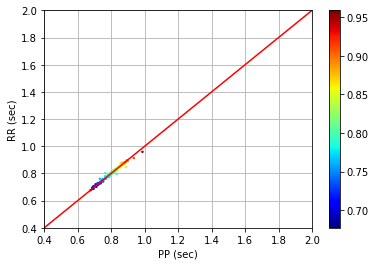

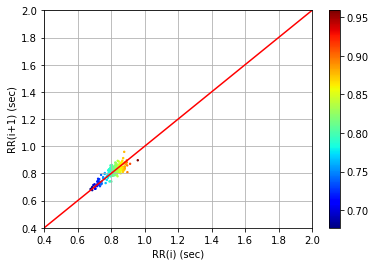

In [50]:
plt.plot([0,2],[0,2],color="red")
plt.scatter(PP,RR,s=2,c=RR,cmap="jet")
plt.xlim([0.4,2.0])
plt.ylim([0.4,2.0])
plt.xlabel("PP (sec)")
plt.ylabel("RR (sec)")
plt.colorbar()
plt.savefig("RR_PP_R.png",dpi=300)
plt.grid()
plt.show()

plt.plot([0,2],[0,2],color="red")
plt.scatter(RR[1::],RR[0:len(RR)-1],s=2,c=RR[1::],cmap="jet")
plt.xlim([0.4,2.0])
plt.ylim([0.4,2.0])
plt.xlabel("RR(i) (sec)")
plt.ylabel("RR(i+1) (sec)")
plt.savefig("RR_poincare_R.png",dpi=300)
plt.colorbar()
plt.grid()
plt.show()